#### This notebook represents the final model (Random forest) chosen for our project with the best performance. 

In [1]:
import pandas as pd
import numpy as np
import geohash
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

### Read the data

In [2]:
#taxidata=pd.read_csv("/Users/diana2/Dropbox/Spring2018Classes/DataSciIndustry/FinalProject/features.csv")
taxidata=pd.read_csv(r'C:\Users\diana\Dropbox\Spring2018Classes\DataSciIndustry\FInalProject/features.csv')

taxidata = taxidata.drop(taxidata.columns[0], axis=1)
taxidata = taxidata.drop(columns="pickup_datetime", axis=1)
taxidata = taxidata.drop(columns="date_of_year", axis=1)
taxidata = taxidata.drop(columns="year", axis=1)
taxidata = taxidata.drop(columns="da", axis=1)
taxidata = taxidata.drop(columns="Pickup Geohash", axis=1)
taxidata = taxidata.drop(columns="Dropoff Geohash", axis=1)

#print(taxidata.shape)
taxidata.head()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,travel_time,mo,temp,visib,wdsp,gust,...,day_of_week,weekday,day_binned,day_hour,time_binned,day_number,day_cosine,day_sine,time_cosine,time_sine
0,40.731525,-73.988670,40.760036,-73.984856,626,1,27.1,8.9,7.5,28.9,...,1.0,1.0,0.142857,3.0,0.125000,0.160714,0.532032,0.846724,0.707107,0.707107
1,40.713608,-74.013718,40.765598,-73.980713,1192,1,32.7,9.6,2.9,999.9,...,1.0,1.0,0.142857,17.0,0.708333,0.244048,0.037391,0.999301,-0.258819,-0.965926
2,40.773960,-73.874435,40.766693,-73.955414,842,1,18.4,10.0,6.2,22.0,...,2.0,1.0,0.285714,0.0,0.000000,0.285714,-0.222521,0.974928,1.000000,0.000000
3,40.749718,-73.991570,40.768169,-73.912483,1054,1,40.4,10.0,6.5,22.9,...,5.0,1.0,0.714286,7.0,0.291667,0.755952,0.037391,-0.999301,-0.258819,0.965926
4,40.762730,-73.974174,40.779640,-73.961823,538,5,77.9,9.0,4.2,19.0,...,0.0,0.0,0.000000,14.0,0.583333,0.083333,0.866025,0.500000,-0.866025,-0.500000


### Extract and define training and testing data

### Random Forest Model (see RandomForest.ipynb notebook for the process of designing this model)

In [4]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None, verbose=0):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func, verbose=verbose)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds, verbose=verbose)
    gs.fit(X, y)
    best = gs.best_estimator_
    return best

### Extract and define training and testing data

In [13]:
X = taxidata.drop(["travel_time"], axis=1) # all rows, no label
Y = taxidata["travel_time"] # all rows, label only (travel_time)

#print(X.shape)
#print(Y.shape)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.2, random_state=42)

### Random Forest

In [14]:
model = RandomForestRegressor(n_estimators=20, n_jobs=-1)
parameters2 = {"n_estimators": [50],
              "max_features": ["auto"], # ["auto","sqrt","log2"]
              "max_depth": [50]}
best2 = cv_optimize(model, parameters2, X_train2, Y_train2, n_folds=5, score_func='neg_mean_squared_error', verbose=3)

# Fit the best Random Forest and calculate R^2 values for training and test sets
reg2=best2.fit(X_train2, Y_train2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=50, max_features=auto, n_estimators=50 ................
[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-69024.45981810744, total= 8.4min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.7min remaining:    0.0s


[CV] max_depth=50, max_features=auto, n_estimators=50 ................
[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-69447.45558458247, total= 7.7min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 16.7min remaining:    0.0s


[CV] max_depth=50, max_features=auto, n_estimators=50 ................
[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-69738.95634711851, total= 7.6min
[CV] max_depth=50, max_features=auto, n_estimators=50 ................
[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-69658.4054745872, total= 7.7min
[CV] max_depth=50, max_features=auto, n_estimators=50 ................
[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-69337.79934975205, total= 7.7min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 40.6min finished


### Evaluate Performance

In [25]:
from sklearn.metrics import mean_squared_error

Y_pred_train=reg2.predict(X_train2)
Y_pred_test=reg2.predict(X_test2)

training_accuracy2 = reg2.score(X_train2, Y_train2)
test_accuracy2 = reg2.score(X_test2, Y_test2)

print("Training R^2: %0.4f" % (training_accuracy2))
print("Testing R^2: %0.4f" % (test_accuracy2))

#Output RMSE, RMSLE
#rmse_train = np.sqrt(mean_squared_error(scale(reg2.predict(X_train2)),scale(Y_train2)))
rmse_train = np.sqrt(mean_squared_error(scale(reg2.predict(X_train2)),scale(Y_train2)))
print("Training RMSE = %0.3f" % rmse_train)

rmse_test = np.sqrt(mean_squared_error(scale(reg2.predict(X_test2)),scale(Y_test2)))
print("Testing RMSE = %0.3f" % rmse_test)

rmsle_train = np.sqrt(np.mean(np.power(np.log1p(Y_pred_train) - np.log1p(Y_train2), 2)))
print("Training RMSLE = %0.3f" % rmsle_train)
rmsle_test = np.sqrt(np.mean(np.power(np.log1p(Y_pred_test) - np.log1p(Y_test2), 2)))
print("Testing RMSLE = %0.3f" % rmsle_test)

Training R^2: 0.9701
Testing R^2: 0.7952


C:\Users\diana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Training RMSE = 0.166


C:\Users\diana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Testing RMSE = 0.465
Training RMSLE = 0.205
Testing RMSLE = 0.401


### Evaluate Feature Importance

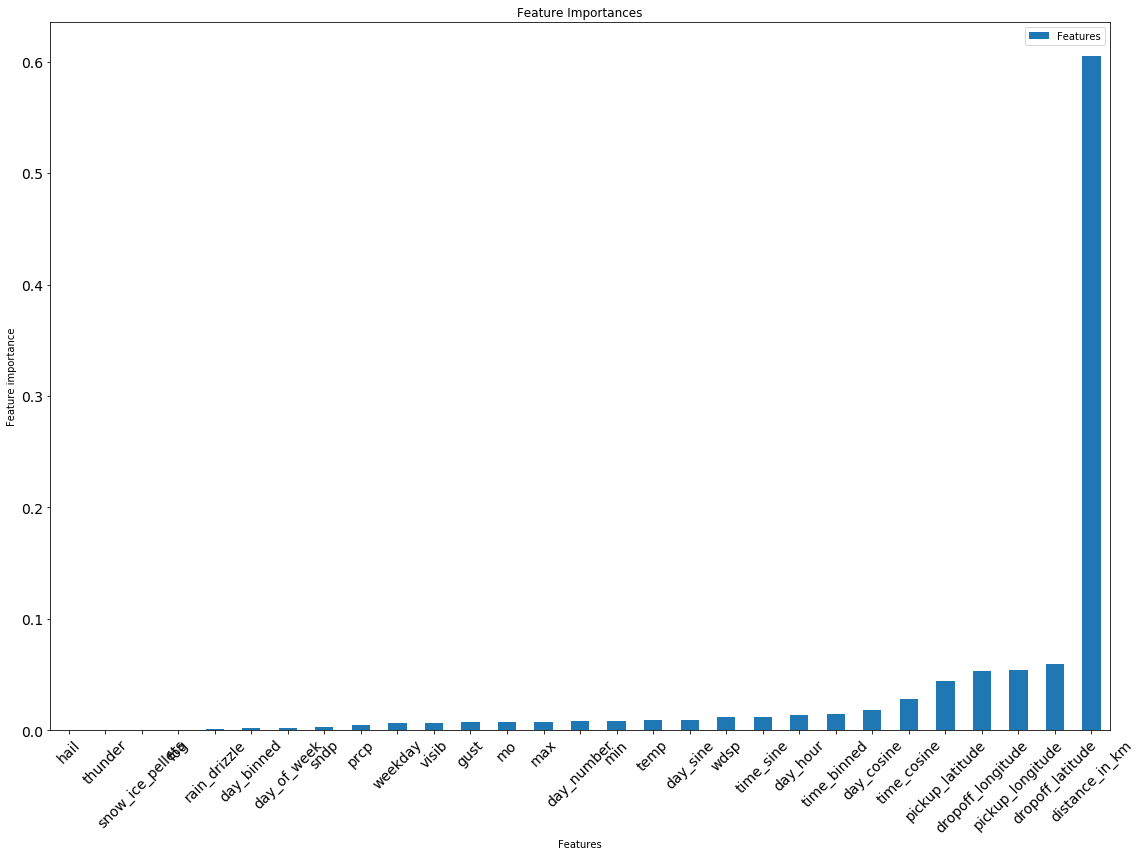

In [67]:
import matplotlib.pyplot as plt

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train2.columns, reg2.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Features'})
importances.sort_values(by='Features').plot(kind='bar', rot=45, figsize=(16, 12), fontsize=14)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Feature importance")
plt.tight_layout()
plt.savefig('feature_importances.png')

### Generate predictions on test dataset 

In [58]:
#taxi_weather_data.csv has been supplemented with weather information and other features needed to make predictions
testing_data = pd.read_csv(r'C:\Users\diana\Dropbox\Spring2018Classes\DataSciIndustry\FInalProject\taxi_weather_data.csv')
col_model=taxidata.columns.values
col_test=testing_data.columns.values
to_delete=[]
for i in col_test:
    if i not in col_model:
        print(i)
        to_delete.append(i)
testing_data=testing_data.drop(to_delete,axis=1)
#testing_data = testing_data.drop(testing_data.columns[0], axis=1)
#testing_data = testing_data.drop(columns="pickup_datetime", axis=1)
testing_data = testing_data.fillna(testing_data.mean())
predictions = reg2.predict(testing_data)

Unnamed: 0
pickup_datetime
passenger_count


### Write predictions to a new CSV called "predictions.csv"

In [64]:
#Read test data provided by Dr. Goldman
df = pd.read_csv(r'C:\Users\diana\Dropbox\Spring2018Classes\DataSciIndustry\FInalProject\APM4990_final_test_data_filtered.csv')

#Add a new column to test data csv entitled "predictions"
df['predictions'] = predictions

#Final CSV with predictions is called "predictions"
df.to_csv(r'C:\Users\diana\Dropbox\Spring2018Classes\DataSciIndustry\FInalProject\predictions_final.csv')
